#### Import the necessary modules and libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
from glob import glob
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Read data

In [3]:
# The names of the data segment were defined here
col_names = ['job_description','industry', 'sector', 'location', 'job_name', 'company_name', 'state']

In [4]:
file_names = glob('jobs_*.csv')
print (file_names)

['jobs_PA.csv', 'jobs_ca2.csv', 'jobs_ca1.csv', 'jobs_ma.csv', 'jobs_ny.csv', 'jobs_nj.csv', 'jobs_texas.csv']


In [5]:
dataframes = [pd.read_csv(file_name) for file_name in file_names]

In [6]:
# Concatenate all the csv files and reset the index.
jobs_df = pd.concat(dataframes)
jobs_df.reset_index(inplace=True, drop=True)

In [7]:
# Examine 20 random rows
jobs_df.sample(20)

,State,Unnamed: 0,company_name,industry,job_description,job_name,location,salary,sector
1485,NJ,19,Wiley,Publishing,Wiley is looking for a VP of Architecture - Ch...,VP of Architecture - Chief Architect,"Hoboken, NJ",NaN,Media
56,PA,34,NaN,strategy,Industry Knowledge - In-depth knowledge and un...,NaN,NaN,NaN,and tactics.
838,MA,21,Indigo,Farm Support Services,Basis Analyst\n\nIndigo is a company dedicated...,Basis Analyst,"Charlestown, MA",NaN,Agriculture & Forestry
1116,NY,28,Lancer Insurance,Insurance Carriers,Lancer Insurance Company is looking for a Data...,Data Engineer,"Long Beach, NY",NaN,Insurance
965,NY,40,Squarespace,Internet,"As part of the Strategy team, Data Scientists ...","Manager, Data Science","New York, NY",NaN,Information Technology
1355,NJ,16,SANOFI,Biotech & Pharmaceuticals,POSITION SUMMARY:\n\nThe Quantitative Systems ...,Principal Scientist- Quantitative Systems Phar...,"Paris, France",NaN,Biotech & Pharmaceuticals
1819,TX,4,Macquarie Group,Investment Banking & Asset Management,"As a Data Science Engineer, you will be workin...",Data Science Engineer,"Sydney, Australia",NaN,Finance
453,PA,20,KPMG,Accounting,Innovate. Collaborate. Shine. Lighthouse KPMG'...,"Senior Associate, Big Data Software Engineer","New York, NY",NaN,Accounting & Legal
183,PA,161,Workland,Staffing & Outsourcing,Our clients located in New Jersey are looking ...,Big Data Engineer,"Montreal, Canada",NaN,Business Services
1370,NJ,3,"Merck&Co., Inc.",Health Care Services & Hospitals,"Requisition ID: ADM009895\n\nMerck&Co., Inc. K...",2019 MRL Trial Optimization Data Analyst Inter...,"Kenilworth, NJ",NaN,Health Care


In [8]:
# Make sure the data was read from all six states
Scrapped_States = jobs_df['State'].unique()
print(Scrapped_States)

['PA' 'CA' 'MA' 'NY' 'NJ' 'TX']


In [9]:
# Check the size of the dataframe
jobs_df.shape
print('There are {} observations and {} features'.format(jobs_df.shape[0],jobs_df.shape[1]))

There are 1889 observations and 9 features


In [10]:
# Make a copy of the dataframe and work with it 
jobs_df_copy = jobs_df.copy()

In [11]:
# Look at the info
jobs_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 9 columns):
State              1889 non-null object
Unnamed: 0         1889 non-null object
company_name       1874 non-null object
industry           1883 non-null object
job_description    1889 non-null object
job_name           1876 non-null object
location           1879 non-null object
salary             140 non-null object
sector             1883 non-null object
dtypes: object(9)
memory usage: 132.9+ KB


#### Data Cleaning

In [12]:
# Look at the list of columns
jobs_df_copy.columns.tolist()

['State',
 'Unnamed: 0',
 'company_name',
 'industry',
 'job_description',
 'job_name',
 'location',
 'salary',
 'sector']

In [13]:
#Two columns are not necessary from this version of the dataframe. DROP THEM
# Unnamed and salary
jobs_df_copy.drop(['Unnamed: 0','salary'], axis = 1, inplace = True)

In [14]:
# Look at the list of columns after dropping
jobs_df_copy.columns.tolist()

['State',
 'company_name',
 'industry',
 'job_description',
 'job_name',
 'location',
 'sector']

In [15]:
# There is no numeric data in this dataset.
# Convert every column to a string
jobs_df_copy['State'] = jobs_df_copy['State'].astype(str)
jobs_df_copy['Company_name'] = jobs_df_copy['company_name'].astype(str)
jobs_df_copy['Industry'] = jobs_df_copy['industry'].astype(str)
jobs_df_copy['Job_description'] = jobs_df_copy['job_description'].astype(str)
jobs_df_copy['Job_name'] = jobs_df_copy['job_name'].astype(str)
jobs_df_copy['Location'] = jobs_df_copy['location'].astype(str)
jobs_df_copy['Sector'] = jobs_df_copy['sector'].astype(str)

In [16]:
# Drop the old columns
jobs_df_copy.drop(['company_name','industry','job_description','job_name','location','sector'], axis = 1, inplace = True)

In [17]:
# Look at the info
jobs_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 7 columns):
State              1889 non-null object
Company_name       1889 non-null object
Industry           1889 non-null object
Job_description    1889 non-null object
Job_name           1889 non-null object
Location           1889 non-null object
Sector             1889 non-null object
dtypes: object(7)
memory usage: 103.4+ KB


In [18]:
titles_with_analysts = [Job_name for Job_name in jobs_df_copy['Job_name'] if (re.findall("Analyst", Job_name))]
titles_with_data_scientists = [Job_name for Job_name in jobs_df_copy['Job_name'] if (re.findall("Scientist", Job_name))]
titles_with_data_engineer = [Job_name for Job_name in jobs_df_copy['Job_name'] if (re.findall("Engineer", Job_name))]
titles_with_manager = [Job_name for Job_name in jobs_df_copy['Job_name'] if (re.findall("Manager", Job_name))]

In [19]:
jobs_df_copy['Title'] = ['Engineer' if i in titles_with_data_engineer else 'Analyst' if i in titles_with_analysts else 'Scientist' if i in titles_with_data_scientists else 'Others' for i in jobs_df_copy['Job_name']]

In [20]:
jobs_df_copy.sample(10)

,State,Company_name,Industry,Job_description,Job_name,Location,Sector,Title
1120,NY,Asana,Enterprise Software & Network Solutions,"The Data team works closely with our product, ...",Data Scientist,"San Francisco, CA",Information Technology,Scientist
929,NY,Deloitte,Accounting,"Position summary\nLead,\nPeople Analytics/Data...","Lead, People Analytics/Data Science","New York, NY",Accounting & Legal,Others
1553,NJ,Audible,Motion Picture Production & Distribution,The Audible Editorial team is looking for a sm...,"Associate Manager, Editorial","Newark, NJ",Media,Others
1333,NJ,Chase,Banks & Credit Unions,JPMorgan Chase & Co. (NYSE: JPM) is a leading ...,Global Supplier Services - Business Writer / I...,"New York, NY",Finance,Others
1642,TX,Citigroup Inc.,Investment Banking & Asset Management,"Primary Location: United States,Texas,Irving\n...","AVP, Model/Anlys/Valid Sr Analyst","New York, NY",Finance,Analyst
953,NY,KPMG,Accounting,"Senior Specialist, Data Science\n*New York, Ne...","Senior Specialist, Data Science","New York, NY",Accounting & Legal,Others
1862,TX,Citigroup Inc.,Investment Banking & Asset Management,"Primary Location: United States,Texas,Irving\n...",Senior Digital Architect Lead Analyst,"New York, NY",Finance,Analyst
770,MA,Brainworks,Computer Hardware & Software,"Our client, a massive retailer, is looking for...",Data Scientist,"Sayville, NY",Information Technology,Scientist
374,PA,IBM,$10+ billion (USD),Job Description\nIBM CIO (Chief Information Of...,Business/Data Analyst Intern-Coop - New York/C...,"Armonk, NY","Amazon, Accenture, Microsoft",Analyst
822,MA,Cyft,Computer Hardware & Software,Cyft is seeking a product leader with a clinic...,VP - Precision Care Management,"Cambridge, MA",Information Technology,Others


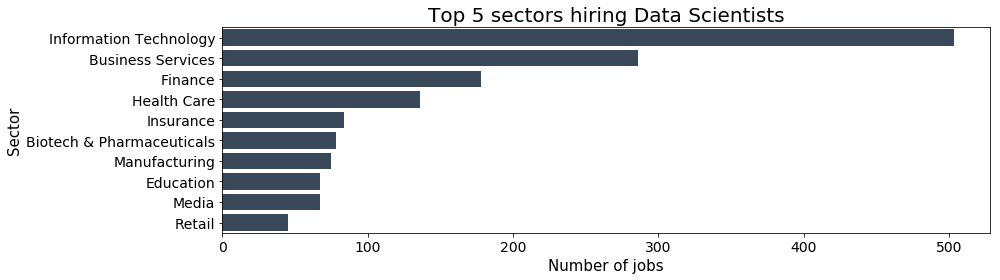

In [21]:
# What are the top 15 sectors that are hiring Data Scientists

# Get the count of each value
num_jobs_sector = jobs_df['sector'].value_counts()

fig = plt.figure()
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.figure(figsize=(14,4))
plt.tight_layout()

plot_1 = sns.barplot(jobs_df['sector'].value_counts().values[:10], jobs_df['sector'].value_counts().index[:10], color = "#34495e")
plt.xlabel('Number of jobs')
plt.ylabel('Sector')
plt.title('Top 5 sectors hiring Data Scientists')
plt.tight_layout()



### Extracting Features From Job Description

In [22]:
# Write a function to extract key words that begin with CAPS
def extract_keywords(text):
    keywords = re.findall(r'([A-Z]{1,}\.?\.*\w*)', text)
    return keywords

In [23]:
jobs_df_copy['Job_description_keywords'] = [extract_keywords(i) for i in jobs_df_copy['Job_description']]

In [24]:
jobs_df_copy['Job_description_keywords_clean'] = [[i.lower() for i in y] for y in jobs_df_copy['Job_description_keywords']]

In [25]:
jobs_df_copy['Job_description_keywords_clean']

0       [at, basf, by, as, we, we, this, and, basf, fo...
1       [description, the, penn, state, administrative...
2       [we, analytics, advanced, analytics, data, art...
3       [description, the, lead, data, scientist, the,...
4       [job, description, itt, engineered, valves, ex...
5       [associate, director, director, advanced, anal...
6       [responsible, pursues, a, business, developmen...
7       [overview, we, software, engineer, engineering...
8       [eaton, corporate, research, technology, group...
9       [comcast, we, as, fortune, we, if, comcast, se...
10      [duration, responsibilities, data, stewards, p...
11      [description, at, upmc, health, plan, we, as, ...
12      [job, description, our, the, xml, the, we, hba...
13      [join, iqvia, the, human, data, science, compa...
14      [data, visualization, ui, developer, departmen...
15      [comcast, technology, product, our, from, tvgo...
16      [description, the, analytics, data, integratio...
17      [join,

In [47]:
important_words = ['hadoop', 'mapreduce', 'spark', 'pig', 'hive', 'shark', 'oozie', 'zookeeper', 'flume', 'mahout',
                   'azure', 'aws', 'sql', 'nosql', 'hbase', 'cassandra', 'mongodb'] + ['matplotlib', 'R plotting', 'Tableau', 'ggplot', 'clustering', 'r', 'python','matlab', 
                   'Big Data', 'Hive', 'Spark', 'HiveQL', 'Elastic Search', 'AWS', 'clustering', 'classification', 
                   'regression', 'probability theory','statistical analysis', 'statistical inference', 
                   'collaborative filtering', 'natural language processing', 'NLP', 'experimental design', 
                   'social networking analysis','Tableau', 'Splunk', 'Decision Trees', 'c', 'c++', 'c' ] + ['excel', 'tableau', 'd3.js', 'sas', 'spss', 'd3', 'spotfire', 'stata'] + ['mathematics', 'economics', 'statistics', 'finance', 'business', 'phd', 'computer science', 
                   'linguistics', 'physics', 'b.a.', 'b.s.', 'bs', 'm.s.', 'ms', 'm.b.a.', 'mba', 'math', 'cs', 
                   'engineering', 'experimental science', 'computational biologist', 'bioinformatician']

In [48]:
for word in important_words:
    jobs_df_copy[word] = jobs_df_copy['Job_description_keywords_clean'].apply(lambda s : s.count(word))

In [49]:
jobs_df_copy.columns.tolist()

['State',
 'Company_name',
 'Industry',
 'Job_description',
 'Job_name',
 'Location',
 'Sector',
 'Title',
 'Job_description_keywords',
 'Job_description_keywords_clean',
 'hadoop',
 'mapreduce',
 'spark',
 'pig',
 'hive',
 'shark',
 'oozie',
 'zookeeper',
 'flume',
 'mahout',
 'azure',
 'aws',
 'sql',
 'nosql',
 'hbase',
 'cassandra',
 'mongodb',
 'matplotlib',
 'R plotting',
 'Tableau',
 'ggplot',
 'clustering',
 'R',
 'Python',
 'MATLAB',
 'Big Data',
 'Hive',
 'Spark',
 'HiveQL',
 'Elastic Search',
 'AWS',
 'classification',
 'regression',
 'probability theory',
 'statistical analysis',
 'statistical inference',
 'collaborative filtering',
 'natural language processing',
 'NLP',
 'experimental design',
 'social networking analysis',
 'Splunk',
 'Decision Trees',
 'C',
 'C++',
 'excel',
 'tableau',
 'd3.js',
 'sas',
 'spss',
 'd3',
 'spotfire',
 'stata',
 'mathematics',
 'economics',
 'statistics',
 'finance',
 'business',
 'phd',
 'computer science',
 'linguistics',
 'physics',
 'b

In [29]:
# Combine different key words for the Diploma/Degrees

jobs_df_copy['Masters'] = jobs_df_copy['m.s.'] + jobs_df_copy['ms'] + jobs_df_copy['m.b.a.'] + jobs_df_copy['mba']
jobs_df_copy['Ph.D.'] = jobs_df_copy['phd'] 
jobs_df_copy['Bachelors'] = jobs_df_copy['b.s.'] + jobs_df_copy['bs'] + jobs_df_copy['b.a.'] 

In [30]:
jobtype_degree = jobs_df_copy.groupby('Title')['Masters','Ph.D.','Bachelors'].sum()
print(jobtype_degree)

           Masters  Ph.D.  Bachelors
Title                               
Analyst         67      8         34
Engineer        73     41         71
Others         213    136         85
Scientist       72     80         33


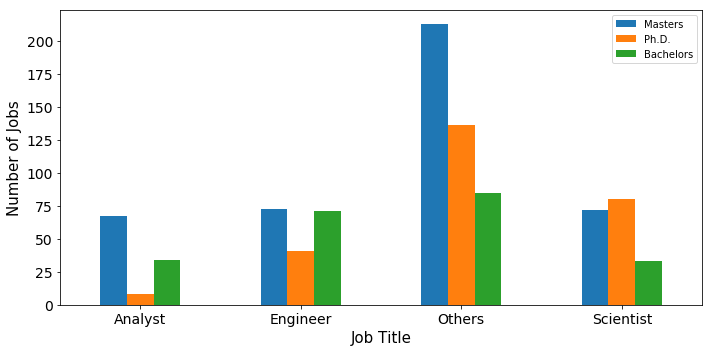

In [31]:
jobtype_degree.plot(kind = 'bar',figsize=(10,5), width=0.5)
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation='horizontal')
plt.tight_layout()

In [33]:
# Combine different fields of study
jobs_df_copy['Mathematics'] = jobs_df_copy['mathematics'] + jobs_df_copy['math'] 
jobs_df_copy['Computer_Science'] = jobs_df_copy['computer science'] + jobs_df_copy['cs'] 
jobs_df_copy['Biologists'] = jobs_df_copy['experimental science'] + jobs_df_copy['computational biologist'] + jobs_df_copy['bioinformatician'] 
jobs_df_copy['Statistics'] = jobs_df_copy['statistics']
jobs_df_copy['Finance'] = jobs_df_copy['finance']
jobs_df_copy['Business'] = jobs_df_copy['business']
jobs_df_copy['Linguistics'] = jobs_df_copy['linguistics']
jobs_df_copy['Physics'] = jobs_df_copy['physics']
jobs_df_copy['Engineering'] = jobs_df_copy['engineering'] 

In [35]:
jobtype_study_branch = jobs_df_copy.groupby('Title')['Mathematics','Computer_Science','Biologists','Statistics','Finance','Business','Linguistics','Physics','Engineering'].sum()
print(jobtype_study_branch)

           Mathematics  Computer_Science  Biologists  Statistics  Finance  \
Title                                                                       
Analyst             67                 3           0          76       60   
Engineer            35                16           0          42       11   
Others             210                20           0         223      112   
Scientist          124                 6           0         125       13   

           Business  Linguistics  Physics  Engineering  
Title                                                   
Analyst         207            1        3           69  
Engineer         80            2       15          260  
Others          456            7       62          468  
Scientist        71            9       35          111  


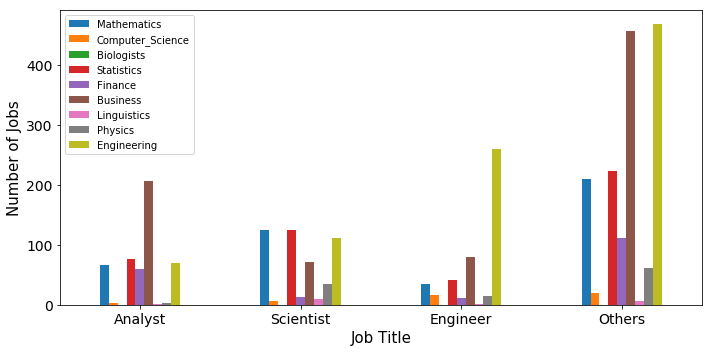

In [36]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


jobtype_study_branch.sort_values('Engineering').plot(kind = 'bar', figsize=(10,5), width=0.5)
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation='horizontal')
plt.tight_layout()

#### Big Data Skills by job type

In [53]:
jobtype_language = jobs_df_copy.groupby('Title')['python','r','sas','spss','MATLAB','C','C++','excel','stata', 'spotfire'].sum()
print(jobtype_language)

           python    r  sas  spss  MATLAB  C  C++  excel  stata  spotfire
Title                                                                    
Analyst       108  131  107    23       0  0    0    191      7        13
Engineer      339  142   18     6       0  0    0     17      0         4
Others        442  468  177    59       0  0    0    133     19        20
Scientist     318  301   98    21       0  0    0     31      4        12


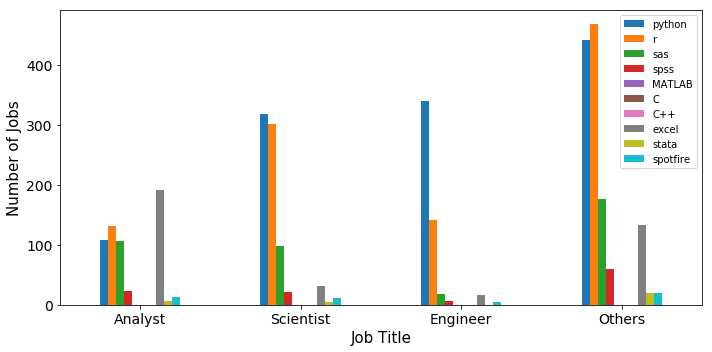

In [54]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


jobtype_language.sort_values('python').plot(kind = 'bar', figsize=(10,5), width=0.5)
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation='horizontal')
plt.tight_layout()

In [56]:
# Combine big data fields by keywords
jobs_df_copy['Hadoop'] = jobs_df_copy['hadoop']
jobs_df_copy['MapReduce'] = jobs_df_copy['mapreduce']
jobs_df_copy['Spark'] = jobs_df_copy['spark'] + jobs_df_copy['Spark']
jobs_df_copy['Pig'] = jobs_df_copy['pig']
jobs_df_copy['Hive'] = jobs_df_copy['Hive'] + jobs_df_copy['hive']
jobs_df_copy['Shark'] = jobs_df_copy['shark']
jobs_df_copy['Oozie'] = jobs_df_copy['oozie']
jobs_df_copy['Zookeeper'] = jobs_df_copy['zookeeper']

jobs_df_copy['Flume'] = jobs_df_copy['flume']
jobs_df_copy['Mahout'] = jobs_df_copy['mahout']
jobs_df_copy['Big Data'] = jobs_df_copy['Big Data']
jobs_df_copy['HiveQL'] = jobs_df_copy['HiveQL']
jobs_df_copy['Splunk'] = jobs_df_copy['Splunk']
jobs_df_copy['Elastic Search'] = jobs_df_copy['Elastic Search']

In [57]:
jobtype_big_data = jobs_df_copy.groupby('Title')['Hadoop','MapReduce','Spark', 'Pig', 'Hive', 'Shark', 'Oozie','Zookeeper', 'Flume','Mahout','Big Data','HiveQL','Splunk','Elastic Search'].sum()
print(jobtype_big_data)

           Hadoop  MapReduce  Spark  Pig  Hive  Shark  Oozie  Zookeeper  \
Title                                                                     
Analyst        29          2     16    5    12      0      0          0   
Engineer      234         29    222   27    85      0      1          9   
Others        239         23    156   29    87      0      2          3   
Scientist      85         12    118   21    46      0      0          0   

           Flume  Mahout  Big Data  HiveQL  Splunk  Elastic Search  
Title                                                               
Analyst        2       0         0       0       0               0  
Engineer       9       5         0       0       0               0  
Others         3       7         0       0       0               0  
Scientist      0       1         0       0       0               0  


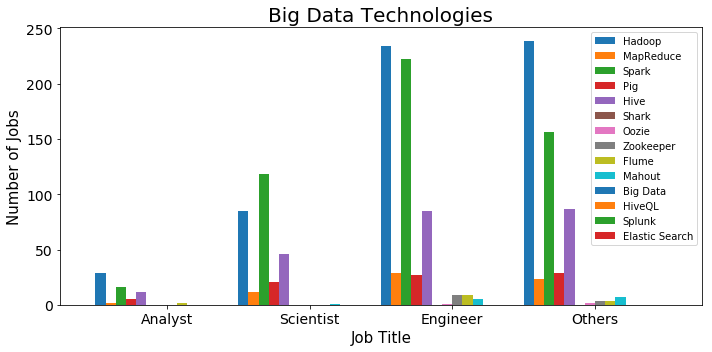

In [58]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


#axes.labelsize : 20
#lines.linewidth : 3
#lines.markersize : 10
#xtick.labelsize : 16
#ytick.labelsize : 16
jobtype_big_data.sort_values('Hadoop').plot(kind = 'bar', figsize=(10,5), width=1)
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation='horizontal')
plt.title('Big Data Technologies')
plt.tight_layout()

#### Data Base Skills by job type

In [59]:
# Combine Data Bases fields by keywords
jobs_df_copy['Azure'] = jobs_df_copy['azure']
jobs_df_copy['AWS'] = jobs_df_copy['aws']
jobs_df_copy['SQL'] = jobs_df_copy['sql'] 
jobs_df_copy['NoSQL'] = jobs_df_copy['nosql']
jobs_df_copy['HBase'] = jobs_df_copy['hbase']
jobs_df_copy['Cassandra'] = jobs_df_copy['cassandra']
jobs_df_copy['MongoDB'] = jobs_df_copy['mongodb']

In [60]:
jobtype_data_bases = jobs_df_copy.groupby('Title')['Azure','SQL','NoSQL','HBase','Cassandra','MongoDB',].sum()
print(jobtype_data_bases)

           Azure  SQL  NoSQL  HBase  Cassandra  MongoDB
Title                                                  
Analyst        5  235     10      3          1        3
Engineer     145  253     96     30         62       47
Others        56  402     47     24         14       20
Scientist     21  163     30     10          6        6


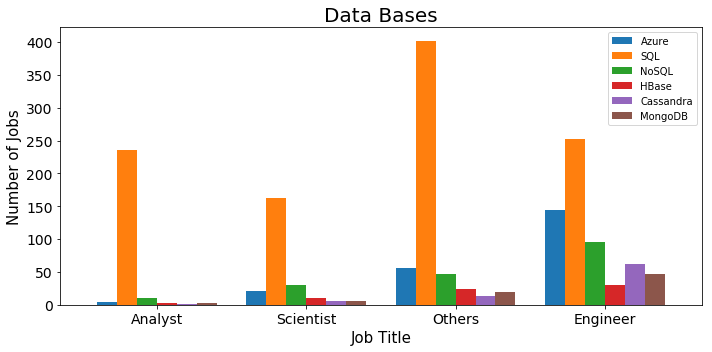

In [61]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


#axes.labelsize : 20
#lines.linewidth : 3
#lines.markersize : 10
#xtick.labelsize : 16
#ytick.labelsize : 16
jobtype_data_bases.sort_values('MongoDB').plot(kind = 'bar', figsize=(10,5), width=.8)
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation='horizontal')
plt.title('Data Bases')
plt.tight_layout()

#### Machine Learning Skills by job type

In [62]:
# Combine Data Bases fields by keywords
jobs_df_copy['Clustering'] = jobs_df_copy['clustering']
jobs_df_copy['Classification'] = jobs_df_copy['classification']
jobs_df_copy['Regression'] = jobs_df_copy['regression']
jobs_df_copy['Probability Theory'] = jobs_df_copy['probability theory']
jobs_df_copy['Statistical Analysis'] = jobs_df_copy['statistical analysis']
jobs_df_copy['Statistical Inference'] = jobs_df_copy['statistical inference']


jobs_df_copy['Collaborative Filtering'] = jobs_df_copy['collaborative filtering']
jobs_df_copy['NLP'] = jobs_df_copy['NLP'] + jobs_df_copy['natural language processing']
jobs_df_copy['Experimental Design'] = jobs_df_copy['experimental design']
jobs_df_copy['Social Networking Analysis'] = jobs_df_copy['social networking analysis']
jobs_df_copy['Decision Trees'] = jobs_df_copy['Decision Trees']

In [63]:
jobtype_ML_statistics = jobs_df_copy.groupby('Title')['Clustering', 'Classification', 'Regression','Probability Theory', 'Statistical Analysis', 'Statistical Inference', 'Collaborative Filtering','NLP','Experimental Design', 'Social Networking Analysis', 'Decision Trees'].sum()
print(jobtype_ML_statistics)

           Clustering  Classification  Regression  Probability Theory  \
Title                                                                   
Analyst             4               2           1                   0   
Engineer            0               0           3                   0   
Others              4               6          11                   0   
Scientist           4               1           7                   0   

           Statistical Analysis  Statistical Inference  \
Title                                                    
Analyst                       0                      0   
Engineer                      0                      0   
Others                        0                      0   
Scientist                     0                      0   

           Collaborative Filtering  NLP  Experimental Design  \
Title                                                          
Analyst                          0    0                    0   
Engineer            

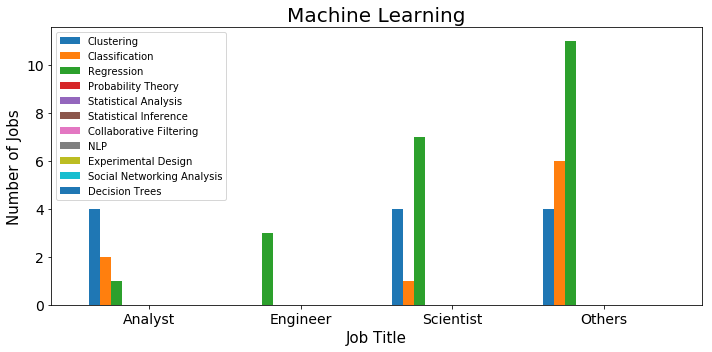

In [64]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


#axes.labelsize : 20
#lines.linewidth : 3
#lines.markersize : 10
#xtick.labelsize : 16
#ytick.labelsize : 16
jobtype_ML_statistics.sort_values('Regression').plot(kind = 'bar', figsize=(10,5), width=.8)
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation='horizontal')
plt.title('Machine Learning')
plt.tight_layout()

In [65]:
sectors = ['Information Technology','Health Care', 'Business Services', 'Biotech & Pharmaceuticals', 'Finance']
jobs_df_copy_top5_sectors = jobs_df_copy[jobs_df_copy.Sector.isin(sectors)]
jobs_df_copy_top5_sectors

,State,Company_name,Industry,Job_description,Job_name,Location,Sector,Title,Job_description_keywords,Job_description_keywords_clean,hadoop,mapreduce,spark,pig,hive,shark,oozie,zookeeper,flume,mahout,azure,aws,sql,nosql,hbase,cassandra,mongodb,matplotlib,R plotting,Tableau,ggplot,clustering,R,Python,MATLAB,Big Data,Hive,Spark,HiveQL,Elastic Search,AWS,classification,regression,probability theory,statistical analysis,statistical inference,collaborative filtering,natural language processing,NLP,experimental design,social networking analysis,Splunk,Decision Trees,C,C++,excel,tableau,d3.js,sas,spss,d3,spotfire,stata,mathematics,economics,statistics,finance,business,phd,computer science,linguistics,physics,b.a.,b.s.,bs,m.s.,ms,m.b.a.,mba,math,cs,engineering,experimental science,computational biologist,bioinformatician,Masters,Ph.D.,Bachelors,Mathematics,Computer_Science,Biologists,Statistics,Finance,Business,Linguistics,Physics,Engineering,r,python,matlab,c,c++,Hadoop,MapReduce,Pig,Shark,Oozie,Zookeeper,Flume,Mahout,Azure,SQL,NoSQL,HBase,Cassandra,MongoDB,Clustering,Classification,Regression,Probability Theory,Statistical Analysis,Statistical Inference,Collaborative Filtering,Experimental Design,Social Networking Analysis
5,PA,Optimal Strategix Group,Consulting,Associate Director / Director – Advanced Analy...,Associate Director / Director – Advanced Analy...,"Newtown, PA",Business Services,Others,"[Associate, Director, Director, Advanced, Anal...","[associate, director, director, advanced, anal...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,PA,Oracle,Enterprise Software & Network Solutions,Responsible for the identification of relevant...,Strategic Data Analyst IV / Bus. Dev Rep IV,"Redwood City, CA",Information Technology,Analyst,"[Responsible, Pursues, A, Business, Developmen...","[responsible, pursues, a, business, developmen...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,PA,Sidecar,Computer Hardware & Software,OVERVIEW:\nWe are looking for a Software Engin...,Software Engineer (Data Platform),"San Francisco, CA",Information Technology,Engineer,"[OVERVIEW, We, Software, Engineer, Engineering...","[overview, we, software, engineer, engineering...",0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,PA,UPMC,Health Care Services & Hospitals,"Description\nAt UPMC Health Plan, ""consumer in...",Data Curation Analyst - Senior,"Pittsburgh, PA",Health Care,Analyst,"[Description, At, UPMC, Health, Plan, We, As, ...","[description, at, upmc, health, plan, we, as, ...",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12,PA,IntePros,Consulting,JOB DESCRIPTION\nOur team supports data ingest...,Cloudera Data Engineer,"Lexington, MA",Business Services,Engineer,"[JOB, DESCRIPTION, Our, The, XML, The, We, HBa...","[job, description, our, the, xml, the, we, hba...",0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
13,PA,IQVIA,Health Care Services & Hospitals,Join us on our exciting journey!\n\nIQVIA™ is ...,Platform Frontend Developer - Advanced Analytics,"Durham, NC",Health Care,Others,"[Join, IQVIA, The, Human, Data, Science, Compa...","[join

In [66]:
groups_state = jobs_df_copy_top5_sectors.groupby(['State','Sector'])['Sector'].apply(lambda x: x.count())
print(groups_state)

State  Sector                   
CA     Biotech & Pharmaceuticals      9
       Business Services             31
       Finance                       16
       Health Care                    5
       Information Technology       128
MA     Biotech & Pharmaceuticals     18
       Business Services             33
       Finance                       12
       Health Care                   11
       Information Technology        72
NJ     Biotech & Pharmaceuticals     30
       Business Services             35
       Finance                       44
       Health Care                   34
       Information Technology        36
NY     Biotech & Pharmaceuticals      2
       Business Services             89
       Finance                       54
       Health Care                   15
       Information Technology        91
PA     Biotech & Pharmaceuticals     17
       Business Services             53
       Finance                       27
       Health Care                   61
       

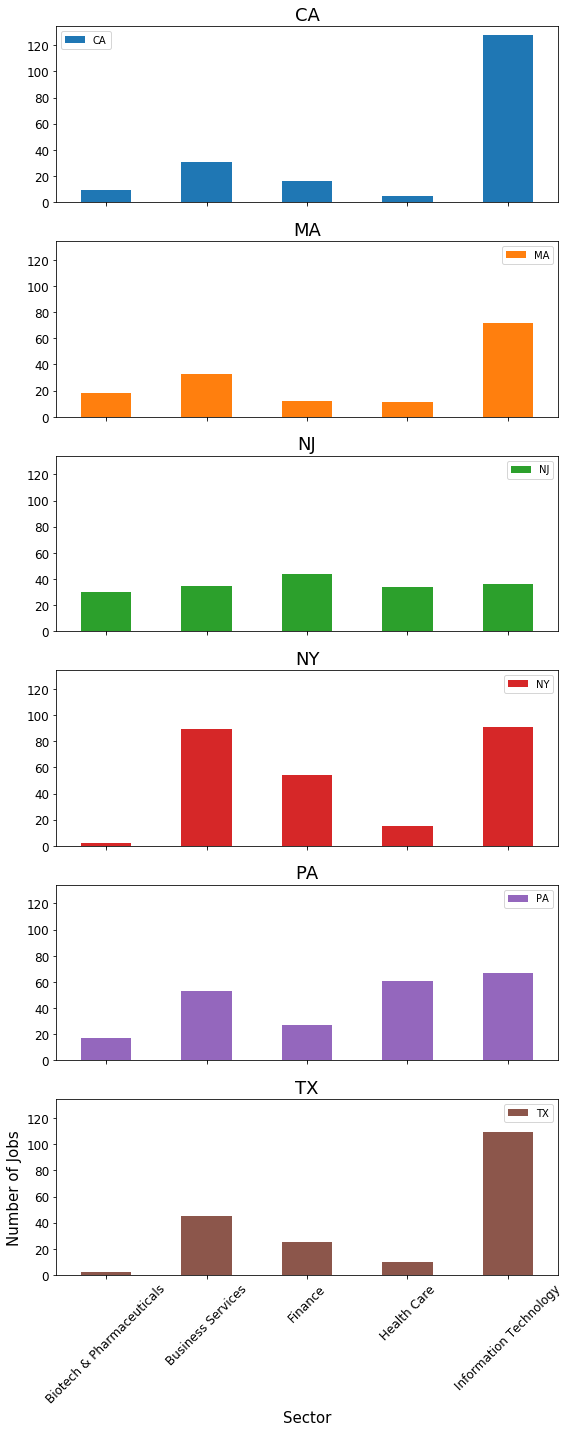

In [67]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

#plot_ny_sectors = sns.barplot(top_5_NY_sectors.values[:5], top_5_NY_sectors.index[:5], color = "#34495e")

groups_state.unstack(level=0).plot(kind='bar', subplots=True, layout=(6, 1),sharex=True, figsize=(8,20), sharey=True)
plt.tight_layout()
plt.xlabel('Sector')
plt.ylabel('Number of Jobs')
#plt.title('Top 5 sectors in NY hiring Data Scientists')
plt.xticks(rotation=45)
plt.tight_layout()



In [68]:
jobs_df_copy2 = jobs_df_copy.copy()

In [69]:
jobs_df_copy2['Company_name'].value_counts()[:15]

IQVIA                    61
IBM                      40
Highmark Health          24
KPMG                     20
Amazon                   20
Accenture                18
RELX Group               18
J.P. Morgan              16
nan                      15
Penn State University    15
Oracle                   12
Merck                    12
Facebook                 11
ZS Associates            11
 – Austin, TX            10
Name: Company_name, dtype: int64

In [70]:
jobs_df_copy2.dropna(axis = 0, how = 'any')

,State,Company_name,Industry,Job_description,Job_name,Location,Sector,Title,Job_description_keywords,Job_description_keywords_clean,hadoop,mapreduce,spark,pig,hive,shark,oozie,zookeeper,flume,mahout,azure,aws,sql,nosql,hbase,cassandra,mongodb,matplotlib,R plotting,Tableau,ggplot,clustering,R,Python,MATLAB,Big Data,Hive,Spark,HiveQL,Elastic Search,AWS,classification,regression,probability theory,statistical analysis,statistical inference,collaborative filtering,natural language processing,NLP,experimental design,social networking analysis,Splunk,Decision Trees,C,C++,excel,tableau,d3.js,sas,spss,d3,spotfire,stata,mathematics,economics,statistics,finance,business,phd,computer science,linguistics,physics,b.a.,b.s.,bs,m.s.,ms,m.b.a.,mba,math,cs,engineering,experimental science,computational biologist,bioinformatician,Masters,Ph.D.,Bachelors,Mathematics,Computer_Science,Biologists,Statistics,Finance,Business,Linguistics,Physics,Engineering,r,python,matlab,c,c++,Hadoop,MapReduce,Pig,Shark,Oozie,Zookeeper,Flume,Mahout,Azure,SQL,NoSQL,HBase,Cassandra,MongoDB,Clustering,Classification,Regression,Probability Theory,Statistical Analysis,Statistical Inference,Collaborative Filtering,Experimental Design,Social Networking Analysis
0,PA,BASF Corporation,Chemical Manufacturing,"At BASF, we create chemistry through the power...",Weather Data Scientist,"Ludwigshafen am Rhein, Germany",Manufacturing,Scientist,"[At, BASF, By, As, We, We, This, And, BASF, Fo...","[at, basf, by, as, we, we, this, and, basf, fo...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PA,Penn State University,Colleges & Universities,Description\n\nThe Penn State Administrative D...,Research Data Analyst,"University Park, PA",Education,Analyst,"[Description, The, Penn, State, Administrative...","[description, the, penn, state, administrative...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PA,Excelacom,Telecommunications Services,We have multiple openings for Analytics profes...,Data Analytics Analyst,"Reston, VA",Telecommunications,Analyst,"[We, Analytics, Advanced, Analytics, Data, Art...","[we, analytics, advanced, analytics, data, art...",1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,PA,Humana,Insurance Carriers,Description\n\nThe Lead Data Scientist uses ma...,Lead Data Scientist - WAH or any Humana Office,"Louisville, KY",Insurance,Scientist,"[Description, The, Lead, Data, Scientist, The,...","[description, the, lead, data, scientist, the,...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,PA,ITT Corporation,Manufacturing,**Job Description:**\n\n\n\nITT Engineered Val...,Executive Assistant and Data Analyst,"Seneca Falls, NY",$500 to $999 million (USD),Analyst,"[Job, Description, ITT, Engineered, Valves, Ex...","[job, description, itt, engineered, valves, ex...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,PA,Optimal Strategix Group,Consulting,Associate Director / Director – Advanced Analy...,Associate Director / Director – Advanced Analy...,"Newtown, PA",Business Services,Others,"[Associate, Director, Director, Advanced, Anal...","[associate, director, dir

In [71]:
jobs_df_copy2['Company_name'].value_counts()[:8]

IQVIA              61
IBM                40
Highmark Health    24
KPMG               20
Amazon             20
Accenture          18
RELX Group         18
J.P. Morgan        16
Name: Company_name, dtype: int64

IQVIA              61
IBM                40
Highmark Health    24
KPMG               20
Amazon             20
Accenture          18
RELX Group         18
J.P. Morgan        16
Name: Company_name, dtype: int64


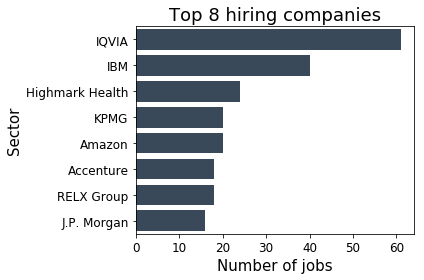

In [72]:
top_8_hiring_companies = jobs_df_copy2['Company_name'].value_counts()[:8]
print(top_8_hiring_companies )


plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

plot_ny_sectors = sns.barplot(top_8_hiring_companies.values, top_8_hiring_companies.index, color = "#34495e")
plt.xlabel('Number of jobs')
plt.ylabel('Sector')
plt.title('Top 8 hiring companies')
plt.tight_layout()




In [73]:
big_data_bysector = jobs_df_copy_top5_sectors.groupby('Sector')['Hadoop','MapReduce','Spark', 'Pig', 'Hive', 'Shark', 'Oozie','Zookeeper', 'Flume','Mahout'].sum()

In [74]:
big_data_bysector

,Hadoop,MapReduce,Spark,Pig,Hive,Shark,Oozie,Zookeeper,Flume,Mahout
Sector,,,,,,,,,,
Biotech & Pharmaceuticals,10,1,13,1,2,0,0,0,0,0
Business Services,110,13,94,13,41,0,0,1,2,4
Finance,59,0,60,16,32,0,0,1,3,0
Health Care,20,1,24,1,7,0,0,0,0,0
Information Technology,180,27,145,26,70,0,3,5,6,5


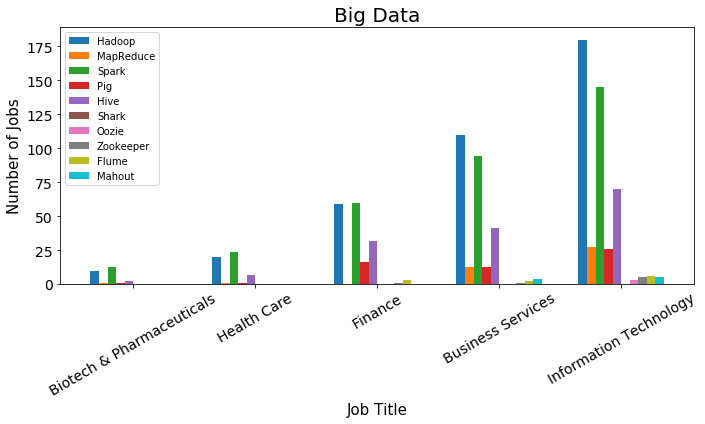

In [75]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


#axes.labelsize : 20
#lines.linewidth : 3
#lines.markersize : 10
#xtick.labelsize : 16
#ytick.labelsize : 16
big_data_bysector.sort_values('Hadoop').plot(kind = 'bar', figsize=(10,6), width=.7)
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=30)
plt.title('Big Data')
plt.tight_layout()

In [77]:
ML_statistics_bysector = jobs_df_copy_top5_sectors.groupby('Sector')['Clustering', 'Classification', 'Regression','Probability Theory', 'Statistical Analysis'].sum()
ML_statistics_bysector 

,Clustering,Classification,Regression,Probability Theory,Statistical Analysis
Sector,,,,,
Biotech & Pharmaceuticals,0,0,0,0,0
Business Services,4,3,9,0,0
Finance,1,1,1,0,0
Health Care,0,0,0,0,0
Information Technology,3,3,5,0,0


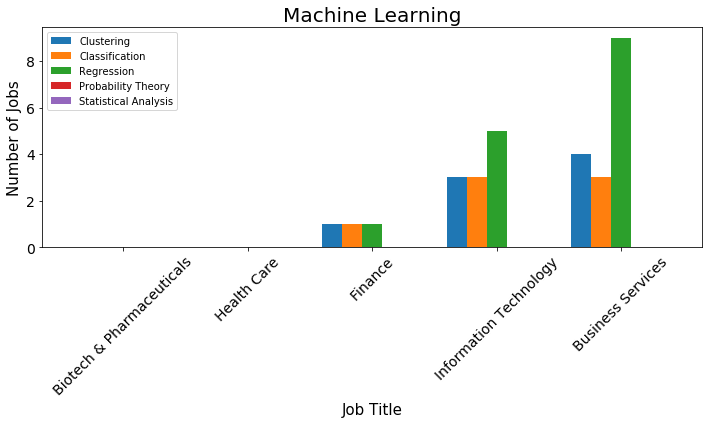

In [78]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


#axes.labelsize : 20
#lines.linewidth : 3
#lines.markersize : 10
#xtick.labelsize : 16
#ytick.labelsize : 16
ML_statistics_bysector.sort_values('Regression').plot(kind = 'bar', figsize=(10,6), width=.8)
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.title('Machine Learning')
plt.tight_layout()

In [79]:
jobtype_data_bases_bysector = jobs_df_copy_top5_sectors.groupby('Sector')['Azure','SQL','NoSQL','HBase','Cassandra','MongoDB',].sum()
jobtype_data_bases_bysector

,Azure,SQL,NoSQL,HBase,Cassandra,MongoDB
Sector,,,,,,
Biotech & Pharmaceuticals,1,19,6,3,3,3
Business Services,33,170,35,7,13,8
Finance,8,105,17,20,12,10
Health Care,1,61,6,2,1,0
Information Technology,115,278,45,26,22,28


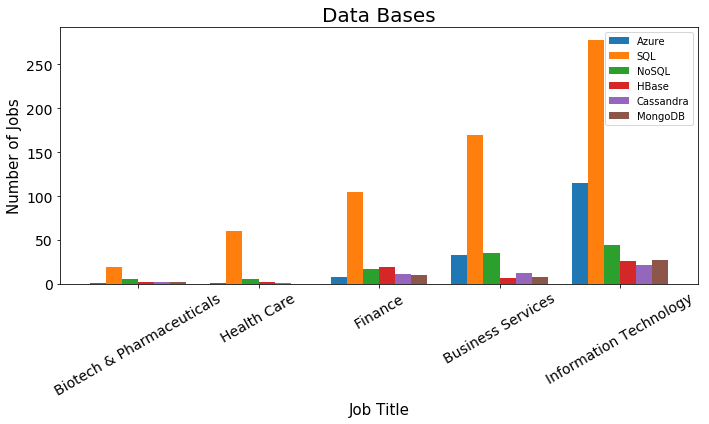

In [80]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


#axes.labelsize : 20
#lines.linewidth : 3
#lines.markersize : 10
#xtick.labelsize : 16
#ytick.labelsize : 16
jobtype_data_bases_bysector .sort_values('SQL').plot(kind = 'bar', figsize=(10,6), width=.8)
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=30)
plt.title('Data Bases')
plt.tight_layout()

### Future Direction

In [67]:
# This project is rather interesting to me and I plan on improving it 
# One way I would want to improve my project is to get a larger number of states and cities represented 
# I would like to set up a way to automatically scrape Glassdoor to keep up with the ever changing demand for data scientists.
# Another way I will want to improve my project is to create a searching model (Locality Sensitive Hashing) that can identify most suitable jobs based on the skills a candidate has.